# AIML 302 Part 10 - Exercises with Results

## Exercise 1

#### Task 1
##### Load the following packages/libraries that are used in this module:
##### pandas, numpy, pickle (Helper packages); nltk (natural language toolkit for text processing); scikit-learn; matplotlib (for visualizing)

#### Result:

In [1]:
# Helper packages.
import os
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

# Packages with tools for text processing.
import nltk

# Packages for working with text data and analyzing sentiment.
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

# Packages to build and measure the performance of a logistic regression model. 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing



#### Task 2 
##### Set `data_dir` to the data directory.

#### Result:

In [2]:
data_dir = "/home/jovyan/iqvia-aiml-302/data"


#### Task 3

##### Import the pickled `score_labels_ex.sav` and `reviews_DTM_ex.sav`

#### Result:

In [4]:
score_labels = pickle.load(open(data_dir + "/score_labels_ex.sav","rb")) 
reviews_DTM_array = pickle.load(open(data_dir + '/reviews_DTM_ex.sav', 'rb'))

#### Task 4
##### Split the `reviews_DTM` dataset to 70% training and 30% test sets.
##### Split `score_labels` the same way too.
##### Use random state 2.
##### Let the output variables be named the same way we named them in class:
##### - `X_train`
##### - `X_test`
##### - `y_train`
##### - `y_test`

#### Result:

In [5]:
X_train, X_test, y_train, y_test = train_test_split(reviews_DTM_array, 
                                                    score_labels, 
                                                    train_size = 0.70,
                                                    random_state = 2)

#### Task 4
##### Use LabelBinarizer function from the preprocessing module to convert categorical variables to binary target variables in `y_test`.

#### Result:

In [6]:
# Initiate the Label Binarizer.
lb = preprocessing.LabelBinarizer()

# Convert y_test to binary integer format.
y_test= lb.fit_transform(y_test)

#### Task 5
##### Build the logistic regression model and save it as `log_model` variable, then inspect it.

#### Result:

In [7]:
# Set up logistic regression model.
log_model = LogisticRegression(solver='liblinear')
print(log_model)

LogisticRegression(solver='liblinear')


#### Task 6
##### Fit the model to `X_train` and `y_train` data.

#### Results:

In [8]:
# Fit the model.
log_model = log_model.fit(X=X_train, y=y_train)

#### Task 7
##### Use the model and predict on the test dataset.
##### Save the predictions to `y_pred` variable.
##### Convert the categorical `y_pred` values to binary values using Label Binarizer.
##### Print the first 5 values of `y_pred`.

#### Result:

In [9]:
# Predict on test data.
y_pred = log_model.predict(X_test)
print(y_pred)

# Convert y_pred to binary integer format.
y_pred= lb.fit_transform(y_pred)
print(y_pred[:5])

['positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'negative' 'negative' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'negative' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'negative' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive']
[[1]
 [1]
 [1]
 [1]
 [1]]


## Exercise 2

#### Task 1
##### Print the confusion matrix and accuracy on the test data.
##### Interpret the results.

#### Result:

In [10]:
# Take a look at test data confusion matrix.
conf_matrix_test = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix_test)

# Compute test model accuracy score.
test_accuracy_score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy on test data: ", test_accuracy_score)

# The model predicts the sentiment of the reviews with about 90% accuracy.
# It predicts the positive reviews better than the negative reviews.

[[ 3  8]
 [ 1 70]]
Accuracy on test data:  0.8902439024390244


#### Task 2
##### Print the classification report by making the target variable classes.

#### Result:

In [11]:
# Result:
# Create a list of target names to interpret class assignments.
target_names = ['Negative', 'Positive']

# Print an entire classification report.
class_report = metrics.classification_report(y_test, y_pred, target_names = target_names)
print(class_report)

              precision    recall  f1-score   support

    Negative       0.75      0.27      0.40        11
    Positive       0.90      0.99      0.94        71

    accuracy                           0.89        82
   macro avg       0.82      0.63      0.67        82
weighted avg       0.88      0.89      0.87        82



#### Task 3
##### Print the probabilities of classifying the reviews as positive/negative.



#### Result:

In [12]:
# Get probabilities instead of predicted values.
test_probabilities = log_model.predict_proba(X_test)
print(test_probabilities[0:5, :])

# Get probabilities of test predictions only.
test_predictions = test_probabilities[: , 1]
print(test_probabilities[0:5])

[[0.04659723 0.95340277]
 [0.02239799 0.97760201]
 [0.41411952 0.58588048]
 [0.18535255 0.81464745]
 [0.39981961 0.60018039]]
[[0.04659723 0.95340277]
 [0.02239799 0.97760201]
 [0.41411952 0.58588048]
 [0.18535255 0.81464745]
 [0.39981961 0.60018039]]


#### Task 4
##### Get TPR, FPR and threshold values.
#### Inspect the results.

#### Result:

In [13]:
# Get FPR, TPR and threshold values.
fpr, tpr, threshold = metrics.roc_curve(y_test, test_predictions)
print("False positive: ", fpr)

False positive:  [0.         0.         0.         0.09090909 0.09090909 0.18181818
 0.18181818 0.27272727 0.27272727 0.27272727 0.36363636 0.36363636
 0.45454545 0.45454545 0.72727273 0.72727273 1.        ]


#### Task 5
#####  Compute the AUC and print it.
##### Plot the ROC curve.
##### Interpret the results.
##### Why do you think we have such results?
##### What could we do to improve our model?

#### Result:

Area under the ROC curve:  0.6293213828425096


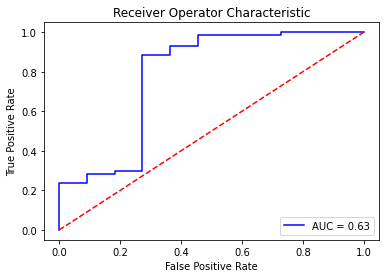

In [14]:
# Get AUC by providing the FPR and TPR.
auc = metrics.roc_auc_score(y_test, y_pred)
print("Area under the ROC curve: ", auc)

# Make an ROC curve plot.
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# We get a fairly poor model, because of a few reasons:
# - Small dataset with relatively few datapoints
# - Unbalanced dataset with the majority of observations being positive and few negative
# - Untuned model

# We could improve our model by:
# - Getting more datapoints (i.e. scraping more reviews or getting our hands on a movie review database)
# - Removing some positive reviews or adding more negative reviews (or even generating some negative reviews!)
# - Tuning the model